In [100]:
# %pip install seaborn
# %pip install plot-keras-history


# Test de faisabilité de clsutering via un CNN Transfert Learning

In [101]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

from sklearn import metrics

from sklearn.metrics import adjusted_rand_score




## Préparation du modèle et des données

In [102]:
# Chargement des données
text_df = pd.read_csv(r'Dataset_projet_pretraitement_textes_images\Flipkart\flipkart_com-ecommerce_sample_1050.csv')

image_files = [f"{id}.jpg" for id in text_df['uniq_id']]
image_folder = r"Dataset_projet_pretraitement_textes_images\Flipkart\Images"
image_paths = [os.path.join(image_folder, f) for f in image_files]
images = [load_img(path, target_size=(224, 224)) for path in image_paths]

c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [103]:
print(len(images), "images loaded.")

1050 images loaded.


In [104]:
model = VGG16()
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [106]:
feature_list=[]
for image in images:
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    features = model.predict(image)
    feature_list.append(features.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [107]:
feature_list_np = np.array(feature_list)

feature_list_np.shape

(1050, 4096)

## Analyse de la faisabilité de la clusterisation

In [108]:
pca_cnn = PCA(n_components=0.99)
pca_cnn_hist = pca_cnn.fit_transform(feature_list_np)
print("Variance expliquée :", pca_cnn.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca_cnn.explained_variance_ratio_.sum())

Variance expliquée : [8.03090334e-02 6.49624243e-02 4.98068109e-02 3.55147272e-02
 3.22152413e-02 2.43258178e-02 2.26224493e-02 1.90314185e-02
 1.78794488e-02 1.60854552e-02 1.43922232e-02 1.30916703e-02
 1.26115130e-02 1.21222800e-02 1.06803384e-02 1.04935896e-02
 9.98682342e-03 9.53355059e-03 9.28869937e-03 9.09049530e-03
 8.32357723e-03 8.27639829e-03 7.90925696e-03 7.66737806e-03
 7.20114587e-03 6.76153740e-03 6.63224608e-03 6.38302136e-03
 6.06768345e-03 5.79403900e-03 5.61683159e-03 5.49101504e-03
 5.31094940e-03 5.05054696e-03 4.97796573e-03 4.88931267e-03
 4.77951393e-03 4.71780403e-03 4.57257219e-03 4.48458223e-03
 4.32016095e-03 4.18919418e-03 4.03924286e-03 3.97604378e-03
 3.78463254e-03 3.75075312e-03 3.62254935e-03 3.59187112e-03
 3.46525898e-03 3.35227116e-03 3.29618901e-03 3.28520685e-03
 3.16739525e-03 3.08685261e-03 3.02608148e-03 2.98892846e-03
 2.94440147e-03 2.87263282e-03 2.81688408e-03 2.76917941e-03
 2.71668495e-03 2.68482557e-03 2.61935662e-03 2.55792309e-03
 2.

In [109]:
print(f"Dimensions après réduction par l'ACP : {pca_cnn_hist.shape}")

Dimensions après réduction par l'ACP : (1050, 803)


In [110]:
df_cnn = pd.DataFrame(feature_list_np)
print(df_cnn.head())

       0         1     2         3         4        5         6     7     \
0  3.398614  0.859573   0.0  1.106563  2.266121  2.92724  2.446446   0.0   
1  0.000000  0.000000   0.0  1.172007  0.000000  0.00000  0.000000   0.0   
2  0.000000  0.000000   0.0  4.457804  0.000000  0.00000  0.000000   0.0   
3  0.000000  0.070992   0.0  2.046282  0.000000  0.00000  0.000000   0.0   
4  3.417155  0.000000   0.0  0.000000  1.012357  0.00000  0.000000   0.0   

   8         9     ...      4086  4087  4088      4089      4090      4091  \
0   0.0  0.000000  ...  0.485878   0.0   0.0  0.472935  0.875755  0.783683   
1   0.0  6.499795  ...  1.169692   0.0   0.0  0.000000  0.000000  3.152507   
2   0.0  2.820564  ...  0.000000   0.0   0.0  0.000000  0.000000  5.270281   
3   0.0  0.894020  ...  0.000000   0.0   0.0  0.000000  0.000000  3.977749   
4   0.0  0.000000  ...  0.000000   0.0   0.0  0.000000  0.000000  9.195918   

       4092      4093      4094  4095  
0  0.000000  0.000000  0.851055   

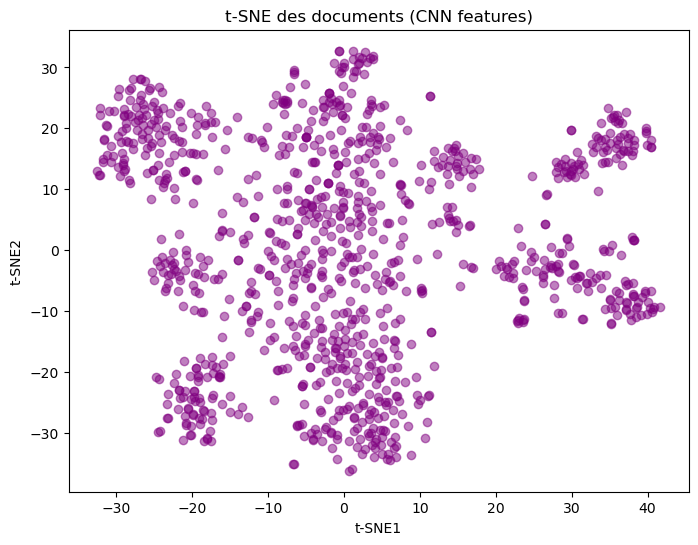

In [111]:
tsne_cnn = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_cnn_hist = tsne_cnn.fit_transform(pca_cnn_hist)

df_cnn['TSNE1_cnn'] = tsne_cnn_hist[:, 0]
df_cnn['TSNE2_cnn'] = tsne_cnn_hist[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (CNN features)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [112]:
def _normalize_cat_str(x):
    if pd.isna(x):
        return ""
    if isinstance(x, list):
        s = " ".join(map(str, x))
    else:
        s = str(x).strip()
        if s.startswith("[") and s.endswith("]"):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, list):
                    s = " ".join(map(str, parsed))
            except Exception:
                pass
    s = s.replace("&gt;", ">>").replace("&amp;", "&")
    return s.strip(" []'\"")

def _split_levels(s):
    if not s:
        return []
    if ">>" in s:
        parts = [p.strip() for p in s.split(">>") if p.strip()]
    else:
        parts = [p.strip() for p in re.split(r'\s*>\s*', s) if p.strip()]
    return parts

def extract_first_level(x):
    parts = _split_levels(_normalize_cat_str(x))
    return parts[0] if parts else np.nan

text_df['categories'] = text_df['product_category_tree'].apply(extract_first_level)


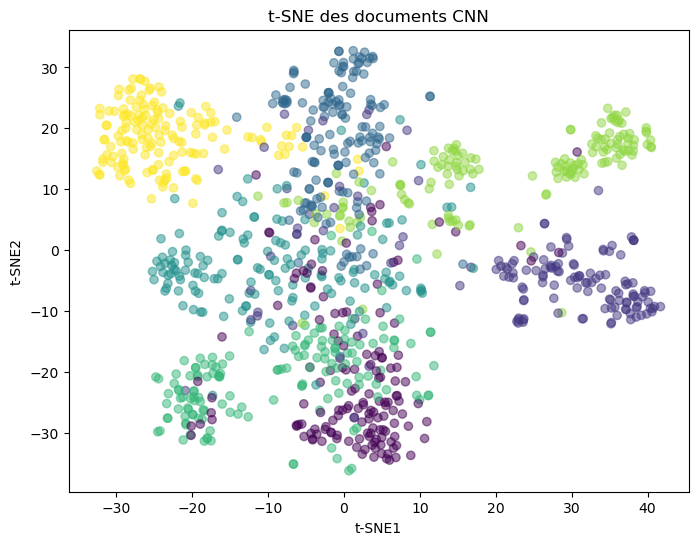

In [113]:
#Pour visualiser suivant les vraies catégories
df_cnn['categories'] = text_df['categories']
df_cnn['cat_code'] = df_cnn['categories'].astype('category').cat.codes

plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c=df_cnn['cat_code'], alpha=0.5)
plt.title('t-SNE des documents CNN')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [114]:
X_cnn = df_cnn[['TSNE1_cnn', 'TSNE2_cnn']]

kmeans_cnn = KMeans(n_clusters=7, random_state=42)
kmeans_cnn.fit(X_cnn)
df_cnn['cluster_cnn'] = kmeans_cnn.labels_

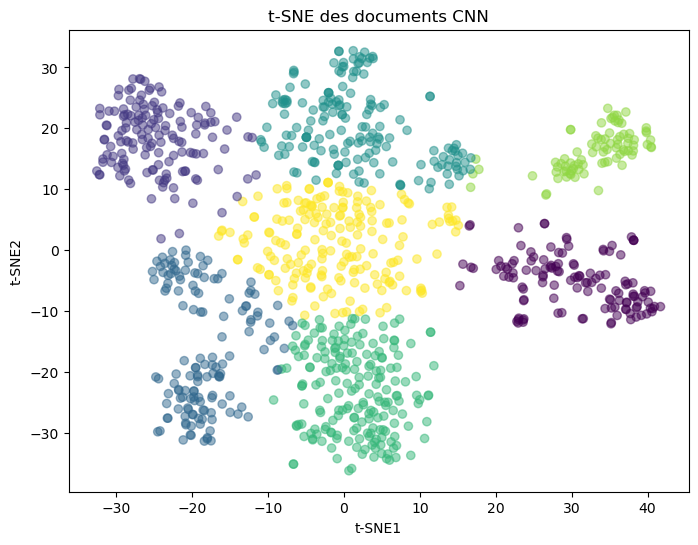

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c=df_cnn['cluster_cnn'], alpha=0.5)
plt.title('t-SNE des documents CNN')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [116]:
ari_cnn = adjusted_rand_score(df_cnn['cluster_cnn'], df_cnn['cat_code'])
print(f"ARI = {ari_cnn:.3f}")

ARI = 0.455


Le clustering semble bien meilleur avec ce modèle. La classification automatique semble possible en utilisant cette méthode.

In [117]:
df_cnn['categories'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [118]:
# Analyse d'images non associées à la bonne catégorie
list_error_0 = [i for i in range(len(df_cnn)) \
                if (df_cnn.iloc[i]['categories']=='Baby Care') and (df_cnn.iloc[i]['cluster_cnn']==6)]
idx = list_error_0[0]
idx

79

In [119]:
df_cnn.head()

,0,1,2,3,4,5,6,7,8,9,...,4091,4092,4093,4094,4095,TSNE1_cnn,TSNE2_cnn,categories,cat_code,cluster_cnn
0,3.398614,0.859573,0.0,1.106563,2.266121,2.92724,2.446446,0.0,0.0,0.000000,...,0.783683,0.000000,0.000000,0.851055,0.0,-19.271574,-20.556437,Home Furnishing,4,2
1,0.000000,0.000000,0.0,1.172007,0.000000,0.00000,0.000000,0.0,0.0,6.499795,...,3.152507,0.000000,0.000000,0.000000,0.0,-4.485678,-19.253826,Baby Care,0,4
2,0.000000,0.000000,0.0,4.457804,0.000000,0.00000,0.000000,0.0,0.0,2.820564,...,5.270281,0.000000,1.297103,0.000000,0.0,0.276518,-19.705187,Baby Care,0,4
3,0.000000,0.070992,0.0,2.046282,0.000000,0.00000,0.000000,0.0,0.0,0.894020,...,3.977749,0.000000,0.000000,0.000000,0.0,-14.984032,-26.681389,Home Furnishing,4,2
4,3.417155,0.000000,0.0,0.000000,1.012357,0.00000,0.000000,0.0,0.0,0.000000,...,9.195918,0.139735,0.000000,1.735954,0.0,-23.184345,-27.633224,Home Furnishing,4,2


In [120]:
# image_file = f"{df_cnn.loc[idx]}.jpg"
# filename = os.path.join(image_folder, image_file)

# # Charger et afficher
# image = imread(filename)
# imshow(image)
# show()

# Ne fonctionne pas

In [121]:
conf_mat = metrics.confusion_matrix(df_cnn['cluster_cnn'], df_cnn['cat_code'])
print(conf_mat)

[[  3 117   1   1   0   5   0]
 [  1   1   1   8   0   0 135]
 [  9   6   0  57  68   0   0]
 [  1   8 110   4   0  32  13]
 [109   4   1   2  78   1   0]
 [  1   1   0   1   0  81   0]
 [ 26  13  37  77   4  31   2]]


In [122]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [123]:
cls_labels_transform = conf_mat_transform(df_cnn['cluster_cnn'], df_cnn['cat_code'])
conf_mat = metrics.confusion_matrix(df_cnn['cluster_cnn'], cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(df_cnn['cluster_cnn'], cls_labels_transform))

Correspondance des clusters :  [4 0 3 6 4 5 1]
[[117   0   0   1   3   5   1]
 [  1 135   0   1   1   0   8]
 [  6   0   0   0  77   0  57]
 [  8  13   0 110   1  32   4]
 [  4   0   0   1 187   1   2]
 [  1   0   0   0   1  81   1]
 [ 13   2   0  37  30  31  77]]

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       127
           1       0.90      0.92      0.91       146
           2       0.00      0.00      0.00       140
           3       0.73      0.65      0.69       168
           4       0.62      0.96      0.76       195
           5       0.54      0.96      0.69        84
           6       0.51      0.41      0.45       190

    accuracy                           0.67      1050
   macro avg       0.58      0.69      0.62      1050
weighted avg       0.59      0.67      0.62      1050



c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

<Axes: >

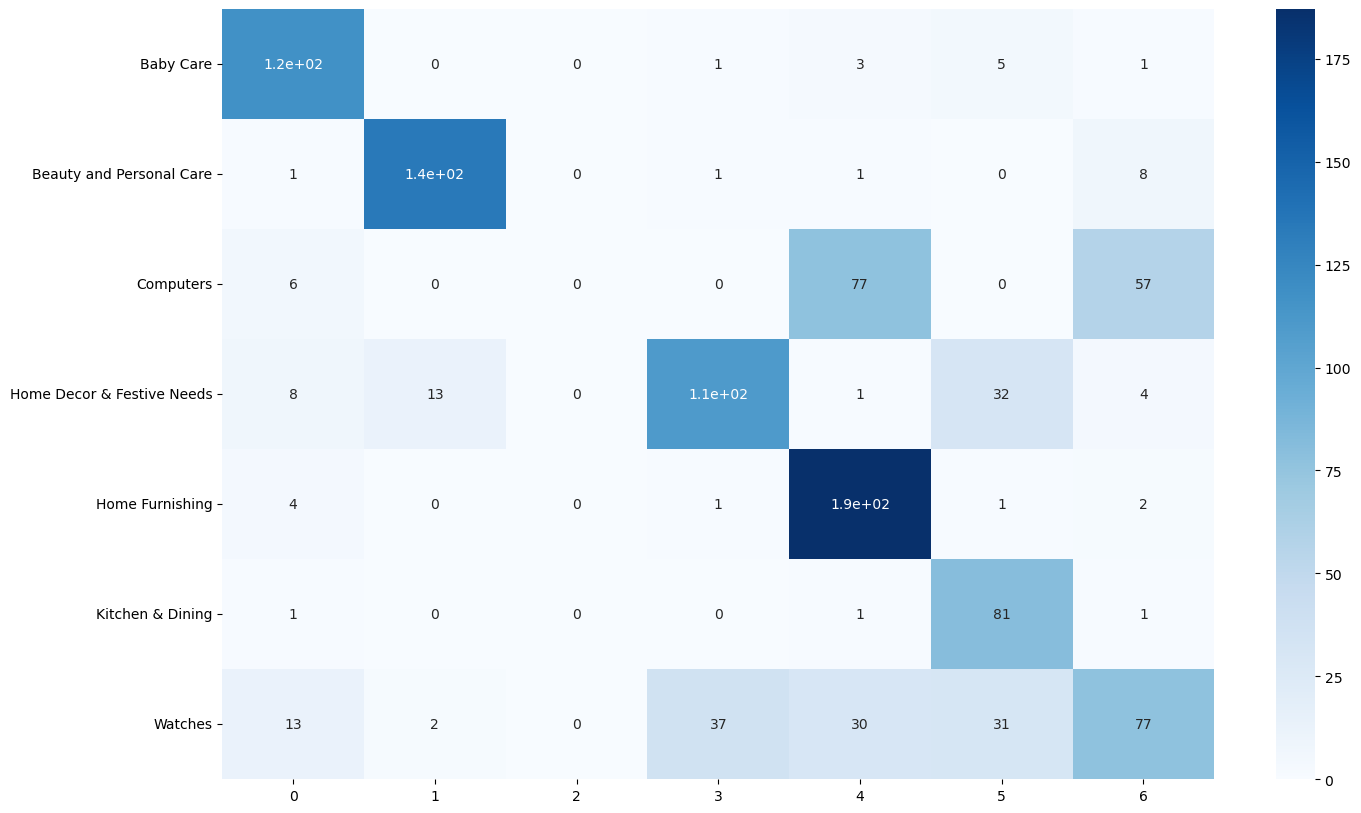

In [124]:
df_cm = pd.DataFrame(conf_mat, index = sorted([label for label in df_cnn['categories'].unique()]),
                  columns = [i for i in [0,1,2,3,4,5,6]])
plt.figure(figsize = (16,10))
sns.heatmap(df_cm, annot=True, cmap="Blues")

La catégorie ordinateurs est celle qui est la mieux prédites.

## Classification supervisée

In [125]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.utils import to_categorical
from plot_keras_history import show_history, plot_history
  


In [126]:
model_list=[]
for image in images:
    image = img_to_array(image)
    image = preprocess_input(image)
    model_list.append(image)

In [127]:
text_df['cat_code'] = text_df['categories'].astype('category').cat.codes

In [128]:
mapping = (
    text_df[['categories', 'cat_code']]
    .drop_duplicates()
    .sort_values('cat_code')
)

print(mapping)

                    categories  cat_code
1                    Baby Care         0
43    Beauty and Personal Care         1
47                   Computers         2
36  Home Decor & Festive Needs         3
0              Home Furnishing         4
37            Kitchen & Dining         5
5                      Watches         6


In [129]:
for category in text_df['categories'].unique():
    count = sum(text_df['categories'] == category)
    print(f"{category}: {count} images")

Home Furnishing: 150 images
Baby Care: 150 images
Watches: 150 images
Home Decor & Festive Needs: 150 images
Kitchen & Dining: 150 images
Beauty and Personal Care: 150 images
Computers: 150 images


In [130]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)  #256 est un bon compromis entre complexité et overfitting
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x) # softmax est un bon algorithme quand on a un équilibre des classes, ce qui est le cas ici

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"]) #rmsprop est un bon optimiseur pour les images

    print(model.summary())
    
    return model

In [131]:
X = np.array(model_list)
X

array([[[[  88.061     ,   87.221     ,   82.32      ],
         [  87.061     ,   86.221     ,   81.32      ],
         [  89.061     ,   85.221     ,   81.32      ],
         ...,
         [  53.060997  ,   49.221     ,   51.32      ],
         [  54.060997  ,   50.221     ,   52.32      ],
         [  53.060997  ,   49.221     ,   51.32      ]],

        [[  99.061     ,   91.221     ,   83.32      ],
         [  97.061     ,   89.221     ,   83.32      ],
         [  98.061     ,   90.221     ,   84.32      ],
         ...,
         [  56.060997  ,   52.221     ,   54.32      ],
         [  54.060997  ,   50.221     ,   52.32      ],
         [  55.060997  ,   51.221     ,   53.32      ]],

        [[  99.061     ,   90.221     ,   84.32      ],
         [ 103.061     ,   92.221     ,   86.32      ],
         [ 103.061     ,   92.221     ,   86.32      ],
         ...,
         [  55.060997  ,   51.221     ,   53.32      ],
         [  56.060997  ,   52.221     ,   54.32      ],
  

In [132]:
X.shape

(1050, 224, 224, 3)

In [133]:
y = to_categorical(text_df['cat_code'], num_classes=7) #one hot encoder
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(1050, 7))

In [134]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42,
    stratify=y   # pour garder les proportions des classes 
)
X_trainval.shape

(840, 224, 224, 3)

In [135]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify=y_trainval, test_size=0.25, random_state=42)
X_train.shape

(630, 224, 224, 3)

Vu le peu de données qu'il y a je choisis de ne pas utiliser de jeu de données de validation.

In [136]:
# Création du modèle
with tf.device('/gpu:0'): 
    model1 = create_model_fct()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [137]:
# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

In [138]:
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3354 - loss: 7.2929
Epoch 1: val_loss improved from None to 1.30080, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 9s/step - accuracy: 0.4175 - loss: 5.4131 - val_accuracy: 0.6857 - val_loss: 1.3008
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6634 - loss: 1.8671
Epoch 2: val_loss improved from 1.30080 to 1.03927, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 112s 12s/step - accuracy: 0.6667 - loss: 1.7859 - val_accuracy: 0.7619 - val_loss: 1.0393
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7401 - loss: 1.3032
Epoch 3: val_loss did not improve from 1.03927
10/10 ━━━━━━━━━━━━━━━━━━━━ 115s 12s/step - accuracy: 0.7397 - loss: 1.3353 - val_accuracy: 0.7762 - val_loss: 1.0946
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7954 - loss: 0.9986 
Epoch 4: val_loss did not improve from 1.03927
10/10 ━━━━━━━━━━━━━━━━━━━━ 120s 12s/step - accuracy: 0.7937 - loss: 0.9828 - val_accuracy: 0.7143 - val_loss: 1.0585
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8385 - loss: 0.6201
Epoch 5: val_loss improved from 1.03927 to 0.90957, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 110s 11s/step - accuracy: 0.8333 - loss: 0.6630 - val_accuracy: 0.7714 - val_loss: 0.9096
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8562 - loss: 0.4473
Epoch 6: val_loss improved from 0.90957 to 0.79946, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 108s 11s/step - accuracy: 0.8556 - loss: 0.4921 - val_accuracy: 0.8143 - val_loss: 0.7995
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8787 - loss: 0.3979
Epoch 7: val_loss improved from 0.79946 to 0.77019, saving model to ./model1_best_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 121s 12s/step - accuracy: 0.8683 - loss: 0.4258 - val_accuracy: 0.8190 - val_loss: 0.7702
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9118 - loss: 0.2579
Epoch 8: val_loss did not improve from 0.77019
10/10 ━━━━━━━━━━━━━━━━━━━━ 108s 11s/step - accuracy: 0.8921 - loss: 0.3053 - val_accuracy: 0.7667 - val_loss: 0.9755
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9232 - loss: 0.2386
Epoch 9: val_loss did not improve from 0.77019
10/10 ━━━━━━━━━━━━━━━━━━━━ 152s 13s/step - accuracy: 0.9222 - loss: 0.2490 - val_accuracy: 0.7810 - val_loss: 0.8504
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9466 - loss: 0.1479
Epoch 10: val_loss did not improve from 0.77019
10/10 ━━━━━━━━━━━━━━━━━━━━ 108s 11s/step - accuracy: 0.9444 - loss: 0.1808 - val_accuracy: 0.8095 - val_loss: 0.8036
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9377 - loss: 0.1426
Epoch 11: val_loss did not improve from 0.77019
10/10 ━━

In [139]:
#Score du dernier Epoch
loss, accuracy = model1.evaluate(X_trainval, y_trainval, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

27/27 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.9571 - loss: 0.2205
Training Accuracy: 0.9571

7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8333 - loss: 0.8391
Validation Accuracy:  0.8333


In [140]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8190
Test Accuracy       :  0.8333


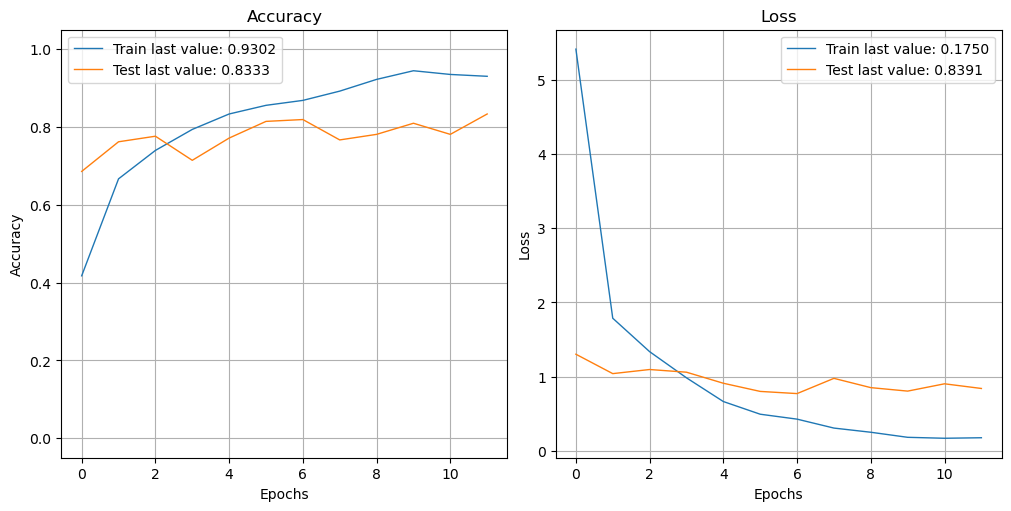

In [141]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

In [ ]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

y_test_num = np.argmax(y_test, axis=1)
y_test_pred = np.argmax(model1.predict(X_test), axis=1)
y_test_num = np.argmax(y_test, axis=1)
print(y_test_num)
print()
print(y_test_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step
[6 5 2 5 5 0 6 2 3 2 3 1 4 0 1 1 2 3 3 3 4 4 6 6 0 4 1 0 5 1 3 3 2 0 6 0 4
 6 6 4 3 2 0 2 2 0 5 6 0 0 3 1 3 1 6 6 1 4 0 4 6 6 4 6 0 2 4 1 1 0 2 5 2 1
 1 6 3 5 4 5 4 1 3 0 2 6 4 6 4 2 4 5 4 5 0 4 1 3 2 3 2 4 1 3 0 5 1 3 0 5 2
 6 1 2 0 2 3 5 1 2 5 0 3 5 0 4 2 5 2 6 0 5 5 0 1 6 0 1 0 0 0 3 3 2 0 5 5 3
 5 3 2 1 1 4 5 1 0 6 2 6 3 3 4 1 3 4 0 3 6 2 5 5 1 5 1 1 6 1 4 6 4 2 2 4 2
 4 0 3 2 5 4 5 1 4 5 3 6 4 6 1 5 4 3 6 6 3 2 6 5 6]

[6 5 2 5 5 0 6 2 3 2 3 1 4 0 1 3 2 3 0 3 4 1 6 6 0 4 3 0 5 1 3 5 2 0 6 0 4
 6 6 4 3 2 4 2 2 0 5 6 1 4 3 1 3 1 6 6 5 4 4 4 6 6 4 6 0 2 4 1 2 0 2 5 2 5
 1 6 3 5 0 5 4 1 3 0 2 6 4 6 4 2 4 2 4 5 0 4 1 3 2 3 2 4 1 4 0 5 1 3 4 5 2
 6 1 2 0 3 3 5 1 2 5 0 3 5 0 4 2 5 2 2 0 5 5 0 1 6 0 1 0 0 0 5 3 2 3 5 5 3
 3 3 2 1 4 4 5 1 0 6 2 6 3 3 4 1 0 4 0 3 6 1 5 2 1 2 1 1 2 1 4 2 4 1 2 4 2
 4 4 3 2 1 4 5 1 4 4 5 6 4 6 1 5 4 3 6 6 3 2 6 5 6]


In [143]:
ari = adjusted_rand_score(y_test_num, y_test_pred)
print(f"ARI = {ari:.3f}")

ARI = 0.666


In [144]:
conf_mat = metrics.confusion_matrix(y_test_num, y_test_pred)
print(conf_mat)

[[23  1  0  1  5  0  0]
 [ 0 24  1  2  1  2  0]
 [ 0  2 27  1  0  0  0]
 [ 2  0  0 24  1  3  0]
 [ 1  1  0  0 28  0  0]
 [ 0  1  3  1  1 24  0]
 [ 0  0  3  0  0  0 27]]


In [152]:
# y_test_pred_transform = conf_mat_transform(y_test_num, y_test_pred)
conf_mat = metrics.confusion_matrix(y_test_num, y_test_pred)
print(conf_mat)
print()
print(metrics.classification_report(y_test_num, y_test_pred))

[[23  1  0  1  5  0  0]
 [ 0 24  1  2  1  2  0]
 [ 0  2 27  1  0  0  0]
 [ 2  0  0 24  1  3  0]
 [ 1  1  0  0 28  0  0]
 [ 0  1  3  1  1 24  0]
 [ 0  0  3  0  0  0 27]]

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.83      0.80      0.81        30
           2       0.79      0.90      0.84        30
           3       0.83      0.80      0.81        30
           4       0.78      0.93      0.85        30
           5       0.83      0.80      0.81        30
           6       1.00      0.90      0.95        30

    accuracy                           0.84       210
   macro avg       0.85      0.84      0.84       210
weighted avg       0.85      0.84      0.84       210



In [146]:
mapping

,categories,cat_code
1,Baby Care,0
43,Beauty and Personal Care,1
47,Computers,2
36,Home Decor & Festive Needs,3
0,Home Furnishing,4
37,Kitchen & Dining,5
5,Watches,6


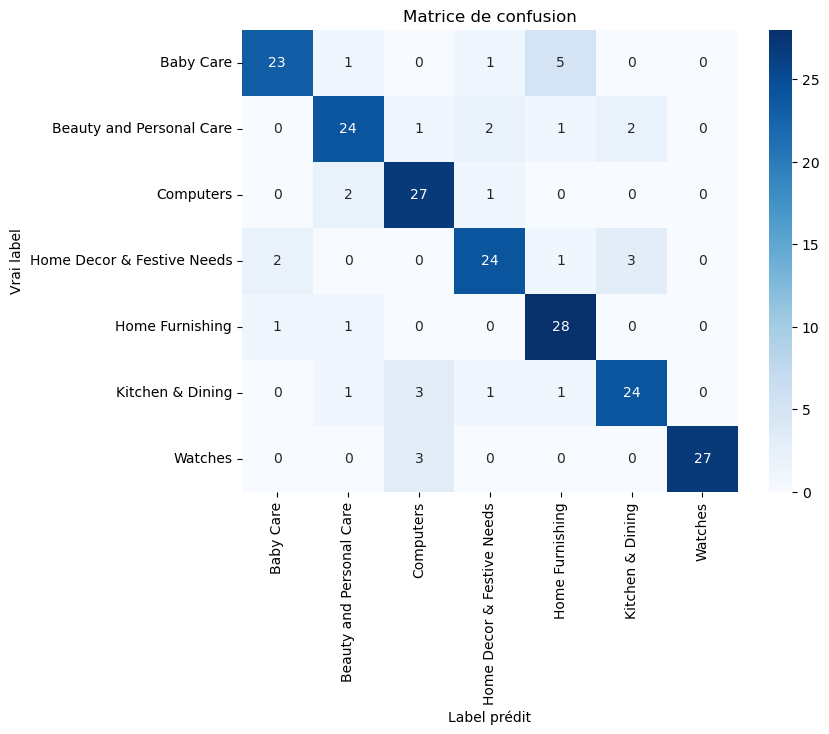

In [153]:
from sklearn.metrics import confusion_matrix

# 1. Crée un mapping catégorie -> cat_code entier
mapping = dict(zip(df_cnn['categories'], df_cnn['cat_code'].astype(int)))

# 2. Trie les catégories selon leur code
sorted_items = sorted(mapping.items(), key=lambda item: item[1])
categories_names = [k for k, v in sorted_items]

# 3. Calcul de la confusion matrix
conf_mat = confusion_matrix(y_test_num, y_test_pred)  

# 4. Transforme en DataFrame pour seaborn
df_cm = pd.DataFrame(conf_mat, index=categories_names, columns=categories_names)

# 5. Affiche la heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues")
plt.ylabel('Vrai label')
plt.xlabel('Label prédit')
plt.title('Matrice de confusion')
plt.show()


La matrice de confusion montre des résultats satisfaisants de la classification puisqu'il y a peu d'erreurs. Les catégories les plus difficiles à prédire pour le modèle sont le Baby care et le Beauty and Personal Car.

## Data Augmentation

In [154]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [155]:
# Pour mélanger les images, classées initalement par classe
df_model = pd.DataFrame({
    'image_paths': image_paths,               # chaque élément est un objet PIL ou un array
    'categories': text_df['categories']
})

df_model.head()

,image_paths,categories
0,Dataset_projet_pretraitement_textes_images\Fli...,Home Furnishing
1,Dataset_projet_pretraitement_textes_images\Fli...,Baby Care
2,Dataset_projet_pretraitement_textes_images\Fli...,Baby Care
3,Dataset_projet_pretraitement_textes_images\Fli...,Home Furnishing
4,Dataset_projet_pretraitement_textes_images\Fli...,Home Furnishing


In [156]:
data = df_model.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,image_paths,categories
0,Dataset_projet_pretraitement_textes_images\Fli...,Computers
1,Dataset_projet_pretraitement_textes_images\Fli...,Kitchen & Dining
2,Dataset_projet_pretraitement_textes_images\Fli...,Computers
3,Dataset_projet_pretraitement_textes_images\Fli...,Beauty and Personal Care
4,Dataset_projet_pretraitement_textes_images\Fli...,Watches


In [157]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    data, data['categories'],
    test_size=0.2,
    random_state=42,
    stratify=data['categories']
)

data_test = pd.DataFrame()
data_test['image_paths'] = X_test['image_paths']
data_test['categories'] = X_test['categories']

In [166]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, 
    X_trainval['categories'], 
    test_size=0.2,    # 20% de validation
    random_state=42,
    stratify=X_trainval['categories']
)

In [167]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col='image_paths', y_col='categories',
                                weight_col=None, target_size=(224, 224),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

In [ ]:
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

datagen_val = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_flow = data_flow_fct(X_trainval, datagen_train, data_type='training')

val_flow = datagen_val.flow_from_dataframe(
    X_val, directory='',
    x_col='image_paths', y_col='categories',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batch_size, 
    shuffle=False, # Pas besoin de mélanger la validation, mais ça ne change rien au score
    seed=42
)


datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

test_flow = data_flow_fct(data_test, datagen_test, data_type=None)

Found 840 validated image filenames belonging to 7 classes.
Found 168 validated image filenames belonging to 7 classes.
Found 210 validated image filenames belonging to 7 classes.


In [169]:
# Création du modèle
with tf.device('/gpu:0'): 
    model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [170]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [171]:
history2 = model2.fit(train_flow,
                validation_data=val_flow,
                batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)

c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3264 - loss: 6.3895
Epoch 1: val_loss improved from None to 0.82103, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.4500 - loss: 4.2632 - val_accuracy: 0.7917 - val_loss: 0.8210
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6778 - loss: 1.6009
Epoch 2: val_loss improved from 0.82103 to 0.60464, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.6762 - loss: 1.5494 - val_accuracy: 0.8155 - val_loss: 0.6046
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7571 - loss: 0.9417
Epoch 3: val_loss improved from 0.60464 to 0.53943, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.7571 - loss: 0.9963 - val_accuracy: 0.8512 - val_loss: 0.5394
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7318 - loss: 0.9564
Epoch 4: val_loss improved from 0.53943 to 0.42944, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.7714 - loss: 0.7945 - val_accuracy: 0.8810 - val_loss: 0.4294
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7975 - loss: 0.6979
Epoch 5: val_loss improved from 0.42944 to 0.37493, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.7893 - loss: 0.7305 - val_accuracy: 0.8988 - val_loss: 0.3749
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8337 - loss: 0.5698
Epoch 6: val_loss improved from 0.37493 to 0.33036, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 154s 6s/step - accuracy: 0.8310 - loss: 0.5611 - val_accuracy: 0.9345 - val_loss: 0.3304
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8449 - loss: 0.5046
Epoch 7: val_loss improved from 0.33036 to 0.26204, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 153s 6s/step - accuracy: 0.8417 - loss: 0.5524 - val_accuracy: 0.9107 - val_loss: 0.2620
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8556 - loss: 0.5643
Epoch 8: val_loss improved from 0.26204 to 0.21278, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.8548 - loss: 0.5321 - val_accuracy: 0.9583 - val_loss: 0.2128
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8655 - loss: 0.4000
Epoch 9: val_loss improved from 0.21278 to 0.17097, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.8643 - loss: 0.4196 - val_accuracy: 0.9464 - val_loss: 0.1710
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8831 - loss: 0.4056
Epoch 10: val_loss did not improve from 0.17097
27/27 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.8667 - loss: 0.4321 - val_accuracy: 0.9524 - val_loss: 0.1752
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8960 - loss: 0.2940
Epoch 11: val_loss improved from 0.17097 to 0.11660, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.8929 - loss: 0.3333 - val_accuracy: 0.9821 - val_loss: 0.1166
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8861 - loss: 0.3416
Epoch 12: val_loss did not improve from 0.11660
27/27 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.8917 - loss: 0.3263 - val_accuracy: 0.9524 - val_loss: 0.1762
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9063 - loss: 0.3424
Epoch 13: val_loss improved from 0.11660 to 0.07358, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9060 - loss: 0.3126 - val_accuracy: 0.9762 - val_loss: 0.0736
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9198 - loss: 0.2632
Epoch 14: val_loss did not improve from 0.07358
27/27 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.9060 - loss: 0.3060 - val_accuracy: 0.9762 - val_loss: 0.0771
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9187 - loss: 0.2433
Epoch 15: val_loss improved from 0.07358 to 0.03557, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9119 - loss: 0.2774 - val_accuracy: 0.9881 - val_loss: 0.0356
Epoch 16/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9353 - loss: 0.1950
Epoch 16: val_loss did not improve from 0.03557
27/27 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.9238 - loss: 0.2119 - val_accuracy: 0.9881 - val_loss: 0.0491
Epoch 17/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9224 - loss: 0.2699
Epoch 17: val_loss improved from 0.03557 to 0.02913, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9202 - loss: 0.2663 - val_accuracy: 0.9881 - val_loss: 0.0291
Epoch 18/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9319 - loss: 0.1820
Epoch 18: val_loss did not improve from 0.02913
27/27 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9286 - loss: 0.2032 - val_accuracy: 0.9821 - val_loss: 0.0603
Epoch 19/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9157 - loss: 0.2224
Epoch 19: val_loss improved from 0.02913 to 0.02244, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.9262 - loss: 0.2080 - val_accuracy: 0.9881 - val_loss: 0.0224
Epoch 20/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9471 - loss: 0.1574
Epoch 20: val_loss improved from 0.02244 to 0.02185, saving model to ./model2_best_weights.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.9500 - loss: 0.1505 - val_accuracy: 0.9940 - val_loss: 0.0219
Epoch 21/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9490 - loss: 0.1767
Epoch 21: val_loss did not improve from 0.02185
27/27 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.9464 - loss: 0.1752 - val_accuracy: 0.9940 - val_loss: 0.0252
Epoch 22/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9233 - loss: 0.2405
Epoch 22: val_loss did not improve from 0.02185
27/27 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9381 - loss: 0.2071 - val_accuracy: 0.9881 - val_loss: 0.0251
Epoch 23/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9467 - loss: 0.1481
Epoch 23: val_loss did not improve from 0.02185
27/27 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.9548 - loss: 0.1461 - val_accuracy: 0.9821 - val_loss: 0.0462
Epoch 24/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9543 - loss: 0.1064
Epoch 24: val_loss improved from 0.02185 to 0.01198, sav

27/27 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.9464 - loss: 0.1376 - val_accuracy: 0.9940 - val_loss: 0.0120
Epoch 25/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9504 - loss: 0.1573
Epoch 25: val_loss did not improve from 0.01198
27/27 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9560 - loss: 0.1499 - val_accuracy: 0.9881 - val_loss: 0.0213
Epoch 26/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9799 - loss: 0.1097
Epoch 26: val_loss did not improve from 0.01198
27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9726 - loss: 0.1362 - val_accuracy: 0.9881 - val_loss: 0.0157
Epoch 27/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9716 - loss: 0.1092
Epoch 27: val_loss did not improve from 0.01198
27/27 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.9607 - loss: 0.1438 - val_accuracy: 0.9940 - val_loss: 0.0122
Epoch 28/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9685 - loss: 0.1600
Epoch 28: val_loss improved from 0.01198 to 0.00227, sav

27/27 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.9607 - loss: 0.1542 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 29/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9617 - loss: 0.0916
Epoch 29: val_loss did not improve from 0.00227
27/27 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.9571 - loss: 0.1227 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 30/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9498 - loss: 0.1374
Epoch 30: val_loss did not improve from 0.00227
27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9655 - loss: 0.1240 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 31/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9820 - loss: 0.0479
Epoch 31: val_loss did not improve from 0.00227
27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9762 - loss: 0.0551 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 32/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9827 - loss: 0.0528
Epoch 32: val_loss did not improve from 0.00227
27/27 ━━

In [172]:
loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

27/27 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9952 - loss: 0.0278
Training Accuracy   : 0.9952

6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9940 - loss: 0.0280 
Validation Accuracy :  0.9940


In [173]:
# Score de l'epoch optimal

model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  1.0000
Test Accuracy       :  0.8619


L'accuracy entre le jeu de données de train et de validation est équivalente, cela signifie qu'il n'y a plus d'iverfitting grâce à la data augmentation.

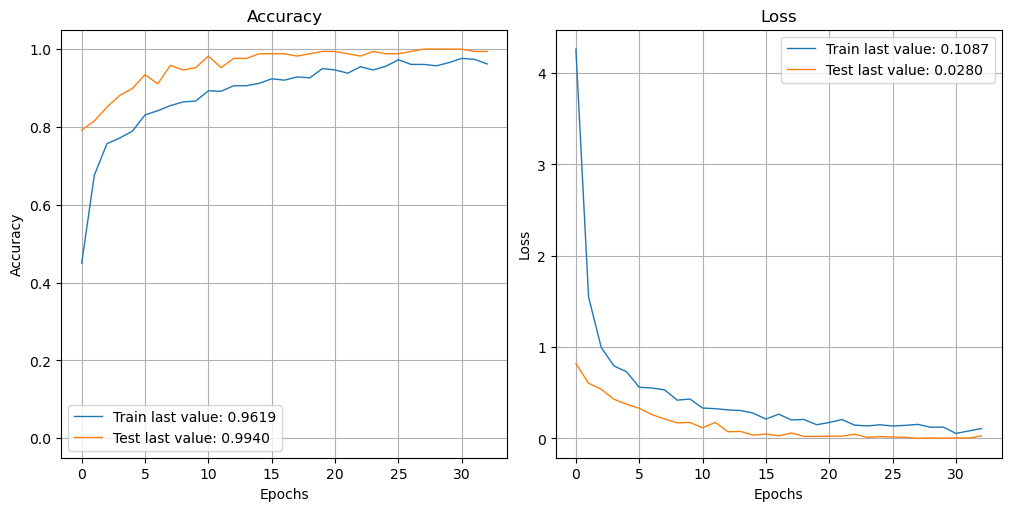

In [174]:
show_history(history2)
plot_history(history2, path="standard.png")
plt.close()